# Itinerary Datasets

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import practicum_utils as utils

In [16]:
files = utils.get_loggi_files()
files

['../data/supply/availability_dist1_ano.csv',
 '../data/supply/availability_dist2_ano.csv',
 '../data/supply/itinerary_dist1_ano.csv',
 '../data/supply/itinerary_dist2_ano.csv']

# Itinerary Drivers Dataset 1

In [17]:
df = pd.read_csv(files[2])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20991 entries, 0 to 20990
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            20991 non-null  int64  
 1   itinerary_id          20991 non-null  object 
 2   driver_id             18284 non-null  object 
 3   created               20991 non-null  object 
 4   accepted              18284 non-null  object 
 5   dropped               1578 non-null   object 
 6   started               18133 non-null  object 
 7   finished              19002 non-null  object 
 8   status                20991 non-null  object 
 9   total_distance        20991 non-null  int64  
 10  transport_type        20991 non-null  object 
 11  product               20991 non-null  object 
 12  product_version       20991 non-null  object 
 13  distribution_center1  20991 non-null  int64  
 14  packages              18150 non-null  float64
 15  delivered_packages 

,Unnamed: 0,itinerary_id,driver_id,created,accepted,dropped,started,finished,status,total_distance,...,delivered_packages,checked_in_at,pickup_checkout_at,pickup_lat,pickup_lng,real_completion_time,pickup_distance,pickup_time,check_in_time,waypoints
0,0,59bf54f6d9bf16ab8c76578f8b03e8bb,5e506cfcfb7cd4d3181b6abba4c76456,19-12-19 09:00,19-12-19 09:05,NaN,19-12-19 09:05,19-12-19 11:16,finished,43434,...,5.0,19-12-19 09:43,19-12-19 09:45,-23.467847,-46.512231,7833.0,5837,1.933333,142.1000,11
1,1,9b9a4cad11ae393b832277b447f1a968,8d29dd0def2357eff973b20241ee8e4f,19-10-14 07:30,19-10-14 07:31,NaN,19-10-14 07:31,19-10-14 08:50,finished,32207,...,9.0,19-10-14 07:32,19-10-14 07:35,-23.467853,-46.512247,4764.0,1524,3.666667,179.0666,14
2,2,542d9fe1c00d45cb1e450adfea35521f,a26395e55f7dfbe49c6154b9984f259f,19-10-10 15:13,19-10-10 15:16,NaN,19-10-10 15:16,19-10-10 15:59,finished,18853,...,1.0,19-10-10 15:17,19-10-10 15:22,-23.467844,-46.512233,2598.0,18853,5.350000,179.5833,2
3,3,9881771a89ba0ea95eef7130598aea25,fe0ebd7aa7e18d71b961a0ccbb8d6319,19-11-01 09:13,19-11-01 09:14,NaN,19-11-01 09:14,19-11-01 12:04,finished,31535,...,9.0,19-11-01 10:05,19-11-01 10:15,-23.467831,-46.512223,10211.0,14281,9.850000,129.6000,10
4,4,a50ada6f391a4fcacdfc7072653f078f,f4e0f38852ef321b7989a87a9639e419,19-11-06 06:10,19-11-06 06:14,NaN,19-11-06 06:14,19-11-06 08:51,finished,74262,...,9.0,19-11-06 06:45,19-11-06 07:13,-23.467841,-46.512218,9413.0,16668,27.916667,149.3666,13


In [18]:
df.nunique()

Unnamed: 0              20991
itinerary_id            20991
driver_id                1610
created                 13085
accepted                13739
dropped                   948
started                 13621
finished                16306
status                      9
total_distance          17603
transport_type              2
product                     1
product_version             2
distribution_center1        1
packages                   46
delivered_packages         46
checked_in_at           14528
pickup_checkout_at      15259
pickup_lat              20723
pickup_lng              20723
real_completion_time    11188
pickup_distance          8430
pickup_time              2220
check_in_time            4113
waypoints                  48
dtype: int64

In [19]:
df.isnull().sum()

Unnamed: 0                  0
itinerary_id                0
driver_id                2707
created                     0
accepted                 2707
dropped                 19413
started                  2858
finished                 1989
status                      0
total_distance              0
transport_type              0
product                     0
product_version             0
distribution_center1        0
packages                 2841
delivered_packages       2841
checked_in_at            2922
pickup_checkout_at       3081
pickup_lat                268
pickup_lng                268
real_completion_time     3052
pickup_distance             0
pickup_time              3091
check_in_time            2939
waypoints                   0
dtype: int64

In [20]:
date_columns = ['created', 'accepted', 'dropped', 'started', 'finished', 'checked_in_at', 'pickup_checkout_at']
for col in date_columns:
    print('to_datetime({})...'.format(col))
    df[col] = pd.to_datetime(df[col], format='%y-%m-%d %H:%M')    

to_datetime(created)...
to_datetime(accepted)...
to_datetime(dropped)...
to_datetime(started)...
to_datetime(finished)...
to_datetime(checked_in_at)...
to_datetime(pickup_checkout_at)...


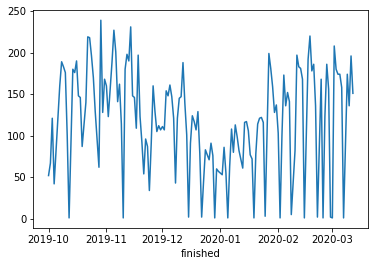

In [21]:
df[(df.status == 'finished')].groupby(df['finished'].dt.date)['itinerary_id'].count().plot();

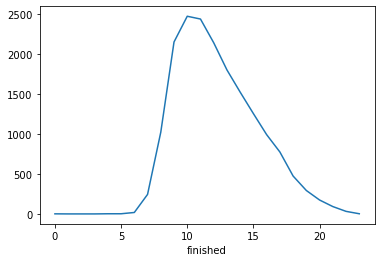

In [22]:
df[(df.status == 'finished')].groupby(df['finished'].dt.hour)['itinerary_id'].count().plot();

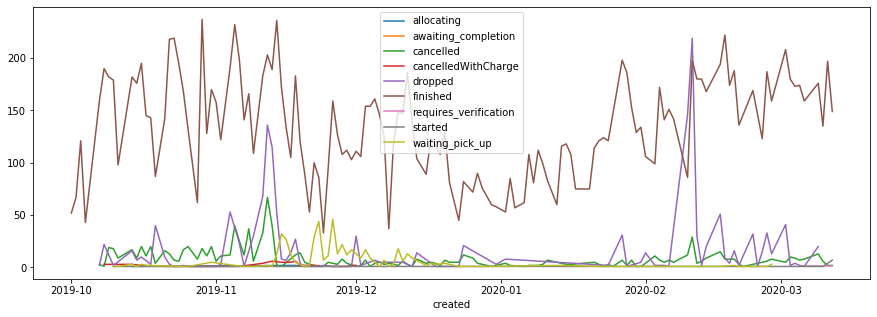

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
for s, g in df[(df.created.notnull()) & (df.status.notnull())].groupby('status'):
    g.groupby(g.created.dt.date).itinerary_id.count().plot(ax=ax, label=s)
plt.legend();

In [10]:
df.groupby('driver_id').itinerary_id.count().sort_values(ascending=False)

driver_id
abae2bc074c8b4af3a7272b12ba66510    190
fae272b321c99415bc913513053c5fd2    187
ca2bdbb2d3b802403205f9d619cc3834    183
4416d590c9179a08081ba762d365b799    178
4a4fc0609d5e034e8e35adf86ed4df9b    176
                                   ... 
bba9c5320af1e4adcee64a26ee0a7c88      1
bbc49c52cfe23121ce31b919680d8a9d      1
519b95dc19454e3fc0af5c6f0e835a66      1
518f8ca76e3b5086aabdf67b3edff8cf      1
fff46f973ad5d3d7a3539924502d228d      1
Name: itinerary_id, Length: 1610, dtype: int64

In [11]:
df.groupby('driver_id').itinerary_id.count().describe()

count    1610.000000
mean       11.356522
std        22.160825
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max       190.000000
Name: itinerary_id, dtype: float64

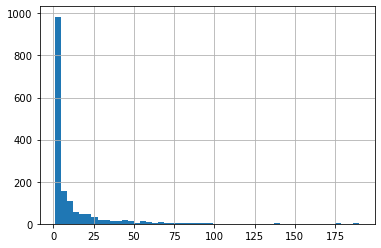

In [12]:
df.groupby('driver_id').itinerary_id.count().hist(bins=50)

In [13]:
#df.groupby('driver_id').itinerary_id.apply(lambda x: x.count() if x.count() < 33 else np.nan).reset_index(name='count')
df.groupby('driver_id').itinerary_id.count()

driver_id
0046f76358739fbd984b7d7d5aadd845      4
0052e0a5b243cb0855827577443dcf97     64
00745ea188d28f5e383123ca2e4459d2      2
00bf731677e64a1d2070c52fc97d3908      1
0100aa06c9be0a9c6f80647bcda96585      1
                                   ... 
fef218a2eb315c218cdaef7129a7a6cc     78
ff041fde5b7cdebdd2f34b23232af70f     15
ffb12f6fe6339fe910736f3050ef4638      3
ffdb5ceab0617e621e87d6169c0c3806    152
fff46f973ad5d3d7a3539924502d228d      1
Name: itinerary_id, Length: 1610, dtype: int64

In [14]:
df.groupby('driver_id').itinerary_id.count().lt(33).reset_index(name='1std')

,driver_id,1std
0,0046f76358739fbd984b7d7d5aadd845,True
1,0052e0a5b243cb0855827577443dcf97,False
2,00745ea188d28f5e383123ca2e4459d2,True
3,00bf731677e64a1d2070c52fc97d3908,True
4,0100aa06c9be0a9c6f80647bcda96585,True
...,...,...
1605,fef218a2eb315c218cdaef7129a7a6cc,False
1606,ff041fde5b7cdebdd2f34b23232af70f,True
1607,ffb12f6fe6339fe910736f3050ef4638,True
1608,ffdb5ceab0617e621e87d6169c0c3806,False


In [29]:
df[df.check_in_time > 60*10].head()

,Unnamed: 0,itinerary_id,driver_id,created,accepted,dropped,started,finished,status,total_distance,...,delivered_packages,checked_in_at,pickup_checkout_at,pickup_lat,pickup_lng,real_completion_time,pickup_distance,pickup_time,check_in_time,waypoints
113,113,e13e35e3dca1049dee0b37c056770c23,2586c07179520b46ce6aa2af1c032d2e,2019-12-07 15:36:00,2019-12-08 08:30:00,NaT,2019-12-08 08:30:00,2019-12-09 13:35:00,finished,86391,...,9.0,2019-12-07 08:30:00,2019-12-07 08:40:00,-23.467830,-46.512246,104683.0,12686,10.0,1620.4500,13
364,364,90c7be905bf44c0f9f1d9af73ed0c08a,5a50de67f810f5450045a367a19fdb03,2020-02-04 11:51:00,2020-02-28 07:53:00,NaT,2020-02-28 07:53:00,2020-02-04 14:15:00,finished,30050,...,7.0,2020-02-04 11:54:00,2020-02-04 11:58:00,-23.467848,-46.512243,0.0,1471,3.9,34499.1166,11
590,590,1b69e61f0302a182aa0fc9297b2bbb60,e37834b1f5d8f6b231e703570307d91b,2019-11-15 11:21:00,2019-11-17 07:45:00,NaT,2019-11-17 07:45:00,2019-11-17 10:02:00,finished,52356,...,4.0,2019-11-15 07:46:00,2019-11-15 07:57:00,-23.467846,-46.512239,8217.0,14296,11.0,3059.2666,18
650,650,4c2368ad7acb8cf226c758b7bfa9dcea,369080c0bcc7480f3254758807297128,2019-11-17 11:21:00,2019-11-18 06:22:00,NaT,2019-11-18 06:22:00,2019-11-18 10:46:00,finished,63311,...,20.0,2019-11-17 06:22:00,2019-11-17 06:35:00,-23.467859,-46.512225,15822.0,17383,13.0,1620.6333,24
653,653,472a1c5079f49f5e1052904d3a2385c2,9c454e23267b520b621199fd4a79e3a6,2019-11-14 07:19:00,2019-11-16 07:32:00,NaT,2019-11-16 07:32:00,2019-11-16 10:41:00,finished,73885,...,14.0,2019-11-14 07:35:00,2019-11-14 07:59:00,-23.467839,-46.512229,11296.0,8782,24.0,3057.8000,24


In [28]:
df.check_in_time.describe()

count     18052.000000
mean        220.160716
std        1906.512506
min        -694.766600
25%         158.329125
50%         176.350000
75%         179.350000
max      176363.433300
Name: check_in_time, dtype: float64